# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('Corona_NLP_train.csv',encoding='latin1')
df=data.dropna()

In [4]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


Spliting Train/Test:

In [5]:
df.groupby('Sentiment').describe()

UserName                                                \
                      count          mean           std     min       25%   
Sentiment                                                                   
Extremely Negative   4249.0  22964.916686  11968.753390  3819.0  12502.00   
Extremely Positive   5273.0  25031.953916  11829.939310  3810.0  15059.00   
Negative             7763.0  23905.016360  11873.688714  3808.0  13493.50   
Neutral              6172.0  25063.771387  11934.902441  3799.0  14660.25   
Positive             9110.0  24741.778705  11832.755683  3800.0  14422.25   

                                               ScreenName                \
                        50%       75%      max      count          mean   
Sentiment                                                                 
Extremely Negative  22239.0  33171.00  44932.0     4249.0  67916.916686   
Extremely Positive  25198.0  35418.00  44941.0     5273.0  69983.953916   
Negative            23894.0  34062.00  44955.0     7763.0  68857.016360   
Neutral             25667.0  35554.75  44951.0     6172.0  70015.771387   
Positive            25046.0  35069.50  44949.0     9110.0  69693.778705   

                                                                        \
                             std      min       25%      50%       75%   
Sentiment                                                                
Extremely Negative  11968.753390  48771.0  57454.00  67191.0  78123.00   
Extremely Positive  11829.939310  48762.0  60011.00  70150.0  80370.00   
Negative            11873.688714  48760.0  58445.50  68846.0  79014.00   
Neutral             11934.902441  48751.0  59612.25  70619.0  80506.75   
Positive            11832.755683  48752.0  59374.25  69998.0  80021.50   

                             
                        max  
Sentiment                    
Extremely Negative  89884.0  
Extremely Positive  89893.0  
Negative            89907.0  
Neutral             89903.0  
Positive            89901.0

In [17]:
df.loc[:,'Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Distribution of Tweet')

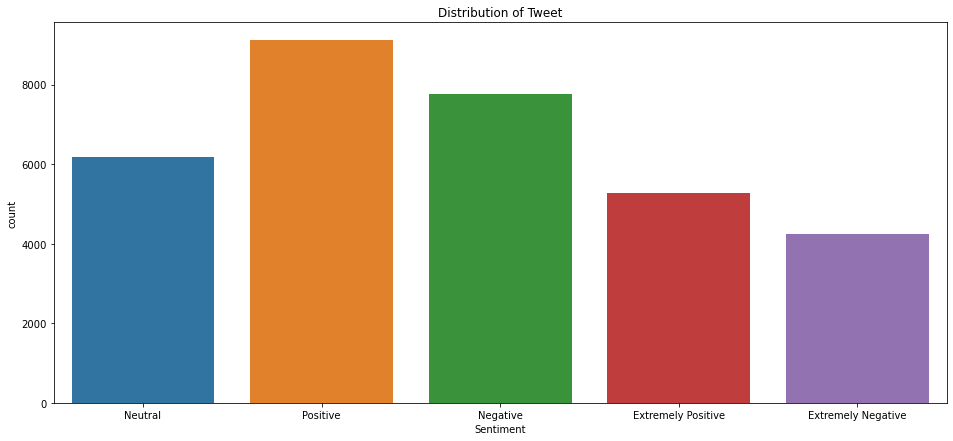

In [21]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,7))
sns.countplot(x = "Sentiment", data = df)
df.loc[:, 'Sentiment'].value_counts()
plt.title('Distribution of Tweet')


In [7]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

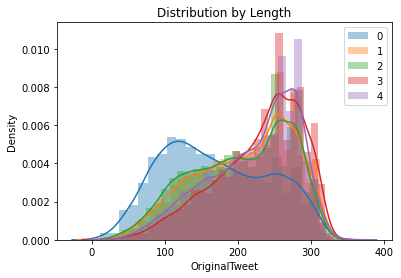

In [8]:
# plotting graph by length.
truthful =df[df['Sentiment'] == 'Neutral']['OriginalTweet'].str.len()
sns.distplot(truthful, label='0')
deceptive = df[df['Sentiment'] == 'Positive']['OriginalTweet'].str.len()
sns.distplot(deceptive, label='1')
deceptive = df[df['Sentiment'] == 'Negative']['OriginalTweet'].str.len()
sns.distplot(deceptive, label='2')
deceptive = df[df['Sentiment'] == 'Extremely Positive']['OriginalTweet'].str.len()
sns.distplot(deceptive, label='3')
deceptive = df[df['Sentiment'] == 'Extremely Negative']['OriginalTweet'].str.len()
sns.distplot(deceptive, label='4')

plt.title('Distribution by Length')
plt.legend()

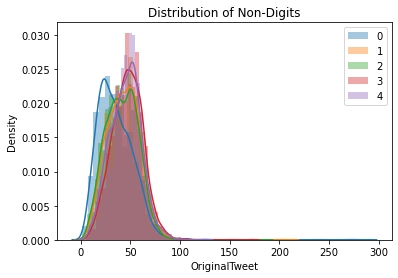

In [9]:
#plotting graph for non-digits.
truthful2 = df[df['Sentiment'] == 'Neutral']['OriginalTweet'].str.replace(r'\w+', '').str.len()
sns.distplot(truthful2, label= 0 )
deceptive2 = df[df['Sentiment'] == 'Positive']['OriginalTweet'].str.replace(r'\w+', '').str.len()
sns.distplot(deceptive2, label= 1)
deceptive2 = df[df['Sentiment'] == 'Negative']['OriginalTweet'].str.replace(r'\w+', '').str.len()
sns.distplot(deceptive2, label= 2)
deceptive2 = df[df['Sentiment'] == 'Extremely Positive']['OriginalTweet'].str.replace(r'\w+', '').str.len()
sns.distplot(deceptive2, label= 3)
deceptive2 = df[df['Sentiment'] == 'Extremely Negative']['OriginalTweet'].str.replace(r'\w+', '').str.len()
sns.distplot(deceptive2, label= 4)
plt.title('Distribution of Non-Digits')
plt.legend()

Training model:

In [10]:
#!pip install nltk

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
#df['OriginalTweet'].str.strip()
p = string.punctuation
t = str.maketrans('','',p)
df['OriginalTweet'].apply(lambda x: x.translate(table))
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,word_tokens,cleaned_text,stemmed,final_text
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral,"[menyrbie, philgahan, chrisitv, httpstcoifz9fa...","[menyrbie, philgahan, chrisitv, httpstcoifz9fa...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan...",menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon...",advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[coronaviru, australia, woolworth, give, elder...",coronaviru australia woolworth give elderli di...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,Positive,"[as, news, of, the, regionâs, first, confirme...","[news, regionâs, first, confirmed, covid19, c...","[news, regionâ, first, confirm, covid19, case...",news regionâ first confirm covid19 case came ...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,Positive,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, grocery, store, sharing, insights, c...","[cashier, groceri, store, share, insight, covi...",cashier groceri store share insight covid19 pr...
...,...,...,...,...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,yâall really shitting that much more at home ...,Negative,"[yâall, really, shitting, that, much, more, a...","[yâall, really, shitting, much, home, covid19...","[yâall, realli, shit, much, home, covid19, co...",yâall realli shit much home covid19 coronavir...
41149,44948,89900,"Toronto, Ontario",14-04-2020,still shocked by the number of toronto superma...,Negative,"[still, shocked, by, the, number, of, toronto,...","[still, shocked, number, toronto, supermarket,...","[still, shock, number, toronto, supermarket, e...",still shock number toronto supermarket employe...
41150,44949,89901,OHIO,14-04-2020,i never that weâd be in a situation amp world...,Positive,"[i, never, that, weâd, be, in, a, situation, ...","[never, weâd, situation, amp, world, going, s...","[never, weâd, situat, amp, world, go, superma...",never weâd situat amp world go supermarket pi...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering to stock supermarket s...,Neutral,"[airline, pilots, offering, to, stock, superma...","[airline, pilots, offering, stock, supermarket...","[airlin, pilot, offer, stock, supermarket, she...",airlin pilot offer stock supermarket shelv nz ...


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['OriginalTweet']=df['OriginalTweet'].str.strip()
# lowercase the text
df['OriginalTweet'] = df['OriginalTweet'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['OriginalTweet']=df['OriginalTweet'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['OriginalTweet'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'OriginalTweet':],df['Sentiment'],test_size=0.2)

In [14]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in X['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1

In [15]:
#!pip install wordcloud

Text(0.5, 1.0, 'Neutral')

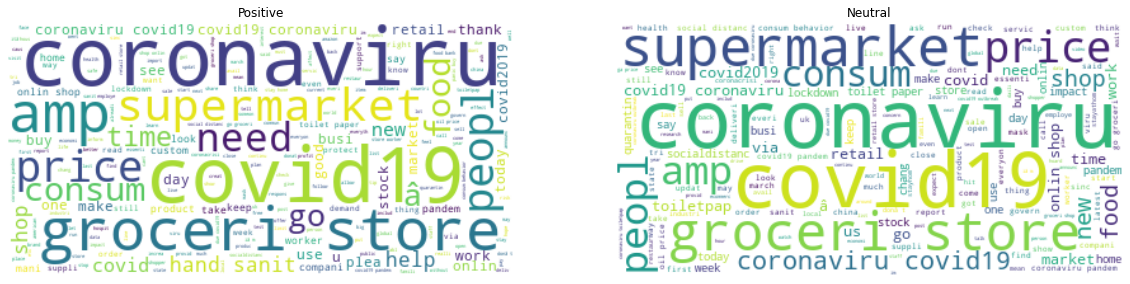

In [16]:
from wordcloud import WordCloud
# Now we look at the types of words in ham and spam. We plot wordclouds for both
ham_text=' '.join(X.loc[y=='Neutral','final_text'].values)
ham_wordcloud = WordCloud(background_color='white',max_words=2000).generate(ham_text)
spam_text=' '.join(X.loc[y=='Positive','final_text'].values)
spam_wordcloud = WordCloud(background_color='white',max_words=2000).generate(spam_text)
plt.figure(figsize=[20,30])
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud,interpolation='bilinear')
plt.title('Positive')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral')